In [1]:
import pandas as pd
import numpy as np

In [2]:
EEC = pd.read_csv ("EECmerged2.csv", encoding ="latin-1")
EEC.head (2)

,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,RT_UNIQUE,BEGIN_MP,END_MP,EEC,Roadway,ProjectNo,Routeuniqu,BEGINNINGMILE,ENDINGMILE
0,1,2,469,1314875,094-KY-0022 -000,17.901,18.008377,6.412957,R2L,582,094-KY-0022 -000,16.057,18.560
1,1,6,639,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,422,106-KY-0055 -000,0.000,1.354


In [3]:
EEC ["LENGTH"]=EEC ["END_MP"]-EEC["BEGIN_MP"]
EEC.head (2)

,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,RT_UNIQUE,BEGIN_MP,END_MP,EEC,Roadway,ProjectNo,Routeuniqu,BEGINNINGMILE,ENDINGMILE,LENGTH
0,1,2,469,1314875,094-KY-0022 -000,17.901,18.008377,6.412957,R2L,582,094-KY-0022 -000,16.057,18.560,0.107377
1,1,6,639,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,422,106-KY-0055 -000,0.000,1.354,0.089000


In [4]:
def start_end(x):
    if x.BEGINNINGMILE>=x.BEGIN_MP and x.BEGINNINGMILE<=x.END_MP:
        return "S"
    elif x.ENDINGMILE>=x.BEGIN_MP and x.ENDINGMILE<=x.END_MP:
        return "E"
    else:
        return "O"

In [5]:
EEC['StartEnd']=EEC.apply (start_end, axis = 1)
EEC.head ()

,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,RT_UNIQUE,BEGIN_MP,END_MP,EEC,Roadway,ProjectNo,Routeuniqu,BEGINNINGMILE,ENDINGMILE,LENGTH,StartEnd
0,1,2,469,1314875,094-KY-0022 -000,17.901,18.008377,6.412957,R2L,582,094-KY-0022 -000,16.057,18.560,0.107377,O
1,1,6,639,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,422,106-KY-0055 -000,0.000,1.354,0.089000,O
2,1,6,748,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,424,106-KY-0055 -000,1.097,1.419,0.089000,O
3,1,10,891,324203,026-US-0421 -000,15.486,15.694000,9.517159,R2L,879,026-US-0421 -000,15.500,17.000,0.208000,S
4,1,15,475,1644421,120-KY-0169 -000,2.047,2.101176,6.960365,R2L,632,120-KY-0169 -000,0.000,3.000,0.054177,O


In [6]:
def new_length (x):
    if x.StartEnd=="S":
        A = x.END_MP - x.BEGINNINGMILE
        return A
    elif x.StartEnd=="E":
        B = x.ENDINGMILE - x.BEGIN_MP
        return B
    else:
        return 0

In [7]:
EEC['NewLength']=EEC.apply (new_length, axis = 1)
EEC.head ()

,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,RT_UNIQUE,BEGIN_MP,END_MP,EEC,Roadway,ProjectNo,Routeuniqu,BEGINNINGMILE,ENDINGMILE,LENGTH,StartEnd,NewLength
0,1,2,469,1314875,094-KY-0022 -000,17.901,18.008377,6.412957,R2L,582,094-KY-0022 -000,16.057,18.560,0.107377,O,0.000
1,1,6,639,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,422,106-KY-0055 -000,0.000,1.354,0.089000,O,0.000
2,1,6,748,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,424,106-KY-0055 -000,1.097,1.419,0.089000,O,0.000
3,1,10,891,324203,026-US-0421 -000,15.486,15.694000,9.517159,R2L,879,026-US-0421 -000,15.500,17.000,0.208000,S,0.194
4,1,15,475,1644421,120-KY-0169 -000,2.047,2.101176,6.960365,R2L,632,120-KY-0169 -000,0.000,3.000,0.054177,O,0.000


In [8]:
EEC ["Weighted_EEC"] = (EEC["NewLength"]/EEC["LENGTH"]) * EEC ["EEC"]
EEC.head ()

,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,RT_UNIQUE,BEGIN_MP,END_MP,EEC,Roadway,ProjectNo,Routeuniqu,BEGINNINGMILE,ENDINGMILE,LENGTH,StartEnd,NewLength,Weighted_EEC
0,1,2,469,1314875,094-KY-0022 -000,17.901,18.008377,6.412957,R2L,582,094-KY-0022 -000,16.057,18.560,0.107377,O,0.000,0.000000
1,1,6,639,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,422,106-KY-0055 -000,0.000,1.354,0.089000,O,0.000,0.000000
2,1,6,748,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,424,106-KY-0055 -000,1.097,1.419,0.089000,O,0.000,0.000000
3,1,10,891,324203,026-US-0421 -000,15.486,15.694000,9.517159,R2L,879,026-US-0421 -000,15.500,17.000,0.208000,S,0.194,8.876581
4,1,15,475,1644421,120-KY-0169 -000,2.047,2.101176,6.960365,R2L,632,120-KY-0169 -000,0.000,3.000,0.054177,O,0.000,0.000000


In [9]:
def new_EEC (x):
    if x.Weighted_EEC ==0:
        C = x.EEC
        return C
    else:
        D = x.Weighted_EEC
        return D

In [10]:
EEC ["NEW_EEC"] = EEC.apply (new_EEC, axis = 1)
EEC.head ()

,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,RT_UNIQUE,BEGIN_MP,END_MP,EEC,Roadway,ProjectNo,Routeuniqu,BEGINNINGMILE,ENDINGMILE,LENGTH,StartEnd,NewLength,Weighted_EEC,NEW_EEC
0,1,2,469,1314875,094-KY-0022 -000,17.901,18.008377,6.412957,R2L,582,094-KY-0022 -000,16.057,18.560,0.107377,O,0.000,0.000000,6.412957
1,1,6,639,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,422,106-KY-0055 -000,0.000,1.354,0.089000,O,0.000,0.000000,8.790572
2,1,6,748,1488424,106-KY-0055 -000,1.150,1.239000,8.790572,R2L,424,106-KY-0055 -000,1.097,1.419,0.089000,O,0.000,0.000000,8.790572
3,1,10,891,324203,026-US-0421 -000,15.486,15.694000,9.517159,R2L,879,026-US-0421 -000,15.500,17.000,0.208000,S,0.194,8.876581,8.876581
4,1,15,475,1644421,120-KY-0169 -000,2.047,2.101176,6.960365,R2L,632,120-KY-0169 -000,0.000,3.000,0.054177,O,0.000,0.000000,6.960365


In [11]:
FinalEEC = EEC['NEW_EEC'].groupby(EEC['JOIN_FID'])
FinalEEC

In [12]:
FinalEEC = EEC['NEW_EEC'].groupby(EEC['ProjectNo'])
FinalEEC

In [74]:
Roadway_EEC = FinalEEC.sum ().to_frame(name='Roadway_EEC')
Roadway_EEC.head ()

,Roadway_EEC
ProjectNo,
4,0.344539
5,-1.020853
6,0.043303
7,2.286784
8,-18.141951


In [14]:
ProjectInfo = pd.read_csv ("Project_Info.csv", encoding ="latin-1")
ProjectInfo.head (2)

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1
0,116,1,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,1,Fulton,038-PF-9999 -000,0.0,0.00,Proposed,0.00000,0
1,34,2,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,2,Fulton,038-CS-2094 -000,0.0,0.38,Existing,-0.11509,0


In [15]:
merged2 = pd.merge (ProjectInfo,Roadway_EEC,left_on = "ProjectNo",right_on = "ProjectNo", how = "outer")
merged2

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC
0,116,1,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,1,Fulton,038-PF-9999 -000,0.000,0.000,Proposed,0.000000,0,NaN
1,34,2,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,2,Fulton,038-CS-2094 -000,0.000,0.380,Existing,-0.115090,0,NaN
2,93,3,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,3,Fulton,038-CR-1013 -000,0.000,0.062,Existing,0.165572,0,NaN
3,101,4,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,4,Fulton,038-KY-0307 -000,1.383,2.096,Existing,-0.228841,4,0.344539
4,186,5,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,5,Fulton,038-US-0051 -000,0.229,0.583,Existing,-0.493284,5,-1.020853
5,207,6,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,1,Ballard,004-US-0051 -000,3.338,3.400,Existing,2.710694,6,0.043303
6,166,7,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,2,Ballard,004-KY-0121 -000,8.639,8.689,Existing,2.710694,7,2.286784
7,417,8,1,Purchase ADD,IP20060004,NaN,"Address condition, safety, congestion and futu...",Major Widening,2 Lane to 4 Lane Divided - Rural,1,Ballard,004-US-0060 -000,7.140,9.730,Existing,0.245900,8,-18.141951
8,316,9,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,1,Ballard,004-KY-0121 -000,8.262,8.369,Existing,-0.356178,9,0.191921
9,274,10,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,2,Ballard,004-KY-0286 -000,0.000,0.097,Existing,-0.289833,10,2.277804


In [16]:
merged2['Roadway_EEC'] = merged2['Roadway_EEC'].replace(np.NaN, 0)
merged2

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC
0,116,1,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,1,Fulton,038-PF-9999 -000,0.000,0.000,Proposed,0.000000,0,0.000000
1,34,2,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,2,Fulton,038-CS-2094 -000,0.000,0.380,Existing,-0.115090,0,0.000000
2,93,3,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,3,Fulton,038-CR-1013 -000,0.000,0.062,Existing,0.165572,0,0.000000
3,101,4,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,4,Fulton,038-KY-0307 -000,1.383,2.096,Existing,-0.228841,4,0.344539
4,186,5,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,5,Fulton,038-US-0051 -000,0.229,0.583,Existing,-0.493284,5,-1.020853
5,207,6,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,1,Ballard,004-US-0051 -000,3.338,3.400,Existing,2.710694,6,0.043303
6,166,7,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,2,Ballard,004-KY-0121 -000,8.639,8.689,Existing,2.710694,7,2.286784
7,417,8,1,Purchase ADD,IP20060004,NaN,"Address condition, safety, congestion and futu...",Major Widening,2 Lane to 4 Lane Divided - Rural,1,Ballard,004-US-0060 -000,7.140,9.730,Existing,0.245900,8,-18.141951
8,316,9,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,1,Ballard,004-KY-0121 -000,8.262,8.369,Existing,-0.356178,9,0.191921
9,274,10,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,2,Ballard,004-KY-0286 -000,0.000,0.097,Existing,-0.289833,10,2.277804


In [17]:
merged2 ["Final_EEC"] = merged2 ["EEC_Intersection"] + merged2 ["Roadway_EEC"]
merged2

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC
0,116,1,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,1,Fulton,038-PF-9999 -000,0.000,0.000,Proposed,0.000000,0,0.000000,0.000000
1,34,2,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,2,Fulton,038-CS-2094 -000,0.000,0.380,Existing,-0.115090,0,0.000000,-0.115090
2,93,3,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,3,Fulton,038-CR-1013 -000,0.000,0.062,Existing,0.165572,0,0.000000,0.165572
3,101,4,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,4,Fulton,038-KY-0307 -000,1.383,2.096,Existing,-0.228841,4,0.344539,0.115698
4,186,5,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,5,Fulton,038-US-0051 -000,0.229,0.583,Existing,-0.493284,5,-1.020853,-1.514136
5,207,6,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,1,Ballard,004-US-0051 -000,3.338,3.400,Existing,2.710694,6,0.043303,2.753996
6,166,7,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,2,Ballard,004-KY-0121 -000,8.639,8.689,Existing,2.710694,7,2.286784,4.997478
7,417,8,1,Purchase ADD,IP20060004,NaN,"Address condition, safety, congestion and futu...",Major Widening,2 Lane to 4 Lane Divided - Rural,1,Ballard,004-US-0060 -000,7.140,9.730,Existing,0.245900,8,-18.141951,-17.896051
8,316,9,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,1,Ballard,004-KY-0121 -000,8.262,8.369,Existing,-0.356178,9,0.191921,-0.164257
9,274,10,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,2,Ballard,004-KY-0286 -000,0.000,0.097,Existing,-0.289833,10,2.277804,1.987970


In [18]:
merged2 ["TYROUTENAM"].unique ()

array(['Proposed', 'Existing', 'Impacted', 'Approach'], dtype=object)

In [75]:
project_type = merged2 ["TYROUTENAM"].value_counts ()
project_type

Existing    862
Proposed     46
Impacted     44
Approach     14
Name: TYROUTENAM, dtype: int64

In [72]:
merged2 ["PROJTYPE"].value_counts ()

Reconstruction           201
RECONSTRUCTION(O)        135
Spot Improvement          88
New Route                 66
MAJOR WIDENING(O)         62
Major Widening            56
Safety-Haz-Elm            55
SAFETY(P)                 53
Minor Widening            44
NEW ROUTE(O)              38
MINOR WIDENING(O)         26
CONGESTION MITIGTN(O)     15
RELOCATION(O)             15
I-CHANGE RECONST(O)       15
NEW INTERCHANGE(O)        12
SPOT IMPROVEMENTS(O)      12
Congestion Management      8
Relocation                 6
Bypass                     6
Transportation Study       6
AIR QUALITY(P)             4
New Interchange            4
Bridge Replacement         3
BYPASS(O)                  3
DESIGN ENGINEERING(O)      3
Landslide Repair           2
PHASE I DESIGN(O)          2
AM-BRIDGE (P)              2
LANDSLIDE REPAIR(P)        2
Lighting                   2
RESURFACING(P)             1
BRIDGE REPLACEMENT(P)      1
PE & ENVIRONMENTAL(O)      1
SAFETY-HAZARD ELIM(P)      1
SCOPING STUDY(

In [77]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [140]:
def bar_chart(data, title='', xlabel='', ylabel= '', va = ""):
    
    ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                     grid=False)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        va = "top"

       

        # Use Y value as label and format number with one decimal place
        label = y_value
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(5, 10),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

       
    

    
    # this forces the plot to display
    plt.show()

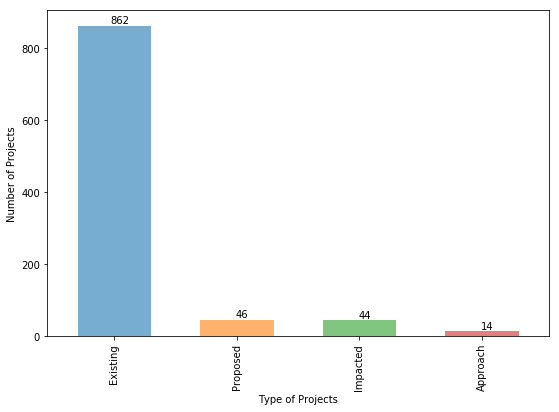

<Figure size 432x288 with 0 Axes>

In [145]:
bar_chart(data=project_type, 
          xlabel='Type of Projects', 
          ylabel='Number of Projects'
          )
plt.savefig("project_type_barchart.png")

In [23]:
project_county = merged2 ["TYCOUNTYDI"].value_counts ().head (20)
#project_county

In [24]:
#bar_chart(data=project_county, 
          #xlabel='County', 
          #ylabel='Number of Projects' 
          #)

In [26]:
merged2 ["Final_EEC"].describe ()

count    966.000000
mean       8.985727
std       54.872002
min     -216.177626
25%       -4.923328
50%        0.000000
75%        7.722832
max      713.267475
Name: Final_EEC, dtype: float64

In [45]:
sorted_ = merged2.sort_values(by= "Final_EEC", ascending=False)
sorted_

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC
428,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,Jefferson,056-KY-1747 -000,10.500,11.995,Existing,419.126769,429,294.140706,713.267475
612,493,613,7,Lexington MPO,IP20060245,7-438,REDUCE CONGESTION ON KY-4 (NEW CIRCLE RD) FROM...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,Fayette,034-KY-0004 -000,13.195,14.508,Existing,236.012679,613,401.575585,637.588264
671,456,672,7,Lexington MPO,IP20190164,NaN,"Address Congestion, Improve Safety, and Improv...",Major Widening,Major Widening-Urban Streets,1,Fayette,034-CS-4524 -000,12.786,14.255,Existing,203.757767,672,217.934056,421.691823
426,503,427,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130129,NaN,Improve safety and reduce congestion on KY 44 ...,Congestion Management,Access Consolidation,1,Bullitt,015-KY-0044 -000,12.215,12.940,Existing,169.237152,427,192.819521,362.056673
647,652,648,7,Lexington MPO,IP20150334,7-593.03 / 7-593.30,NEWTOWN PIKE EXTENSION FROM WEST MAIN ST. TO S...,NEW ROUTE(O),Construct Road in New Location,1,Fayette,034-US-0027 -000,6.207,6.441,Existing,245.641802,648,93.673443,339.315245
580,435,581,6,Northern Kentucky ADD,IP20150257,6-447,IMPROVE MOBILITY AND REDUCE CONGESTION ON US-2...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,Boone,008-US-0025 -000,5.085,9.200,Existing,145.806614,581,148.916873,294.723487
567,818,568,6,Northern Kentucky ADD,IP20130008,6-446,PROVIDE EAST-WEST CONNECTIVITY AND IMPROVED MO...,NEW ROUTE(O),Construct Road in New Location,1,Boone,008-US-0042 -000,12.508,13.489,Existing,132.243175,568,156.918101,289.161276
501,685,502,5,Louisville-Southern Indiana (KIPDA) MPO,IP20160186,5-323.01,WIDEN GREENWOOD ROAD FROM GREENBELT HWY TO DIX...,MAJOR WIDENING(O),Install Two-way Left Turn Lane,1,Jefferson,056-KY-1931 -000,0.540,3.148,Existing,111.006769,502,129.634312,240.641081
600,500,601,6,Northern Kentucky ADD,IP20190064,NaN,Paired Grade-Separated Intersections along KY ...,Congestion Management,NaN,1,Boone,008-KY-0018 -000,14.500,15.100,Existing,139.390583,601,89.270380,228.660963
802,601,803,9,Gateway ADD,IP20150436,9-301.10,NEW ROUTE FROM US-60/KY-32 EAST OF MOREHEAD TO...,NEW ROUTE(O),Construct Road in New Location,1,Rowan,103-KY-0032 -000,5.400,8.400,Existing,195.888528,803,16.954721,212.843249


In [30]:
All_merged = pd.read_csv ("All_merged.csv", encoding ="latin-1")
All_merged.head (2)

,RT_UNIQUE,Roadway type
0,001-KY-0055 -000,R2L
1,001-KY-0055 -000,R2L


In [31]:
Unique = All_merged.drop_duplicates()
#Unique

In [32]:
merged3 = pd.merge (merged2,Unique,left_on = "Routeuniqu",right_on = "RT_UNIQUE", how = "inner")
merged3

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,...,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,RT_UNIQUE,Roadway type
0,101,4,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,4,...,038-KY-0307 -000,1.383,2.096,Existing,-0.228841,4,0.344539,0.115698,038-KY-0307 -000,R2L
1,131,21,1,Purchase ADD,IP20060038,NaN,"Address economic development, and truck access...",Reconstruction,Modernize Roadway-Rural,1,...,038-KY-0307 -000,1.232,2.096,Existing,0.792744,21,0.041991,0.834736,038-KY-0307 -000,R2L
2,186,5,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,5,...,038-US-0051 -000,0.229,0.583,Existing,-0.493284,5,-1.020853,-1.514136,038-US-0051 -000,R2L
3,207,6,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,1,...,004-US-0051 -000,3.338,3.400,Existing,2.710694,6,0.043303,2.753996,004-US-0051 -000,R2L
4,371,78,1,Purchase ADD,IP20170075,NaN,"Address condition, access and future congestio...",Relocation,2 Lane to 4 Lane Divided - Rural,1,...,004-US-0051 -000,4.644,7.327,Existing,-0.553096,78,-3.628274,-4.181370,004-US-0051 -000,R2L
5,166,7,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,2,...,004-KY-0121 -000,8.639,8.689,Existing,2.710694,7,2.286784,4.997478,004-KY-0121 -000,R2L
6,316,9,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,1,...,004-KY-0121 -000,8.262,8.369,Existing,-0.356178,9,0.191921,-0.164257,004-KY-0121 -000,R2L
7,417,8,1,Purchase ADD,IP20060004,NaN,"Address condition, safety, congestion and futu...",Major Widening,2 Lane to 4 Lane Divided - Rural,1,...,004-US-0060 -000,7.140,9.730,Existing,0.245900,8,-18.141951,-17.896051,004-US-0060 -000,R2L
8,274,10,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,2,...,004-KY-0286 -000,0.000,0.097,Existing,-0.289833,10,2.277804,1.987970,004-KY-0286 -000,R2L
9,333,11,1,Purchase ADD,IP20060008,NaN,Correct intersection geometrics and improve sa...,Safety-Haz-Elm,Improve Intersection,1,...,004-KY-0286 -000,4.000,4.530,Existing,0.921167,11,0.070319,0.991486,004-KY-0286 -000,R2L


In [78]:
merged4 = merged3.drop_duplicates(['Final_EEC'])
merged4

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,...,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,RT_UNIQUE,Roadway type
0,101,4,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,4,...,038-KY-0307 -000,1.383,2.096,Existing,-0.228841,4,0.344539,0.115698,038-KY-0307 -000,R2L
1,131,21,1,Purchase ADD,IP20060038,NaN,"Address economic development, and truck access...",Reconstruction,Modernize Roadway-Rural,1,...,038-KY-0307 -000,1.232,2.096,Existing,0.792744,21,0.041991,0.834736,038-KY-0307 -000,R2L
2,186,5,1,Purchase ADD,IP20020002,NaN,Address economic development issues for Fulton...,New Route,Local Roadway Improvements,5,...,038-US-0051 -000,0.229,0.583,Existing,-0.493284,5,-1.020853,-1.514136,038-US-0051 -000,R2L
3,207,6,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,1,...,004-US-0051 -000,3.338,3.400,Existing,2.710694,6,0.043303,2.753996,004-US-0051 -000,R2L
4,371,78,1,Purchase ADD,IP20170075,NaN,"Address condition, access and future congestio...",Relocation,2 Lane to 4 Lane Divided - Rural,1,...,004-US-0051 -000,4.644,7.327,Existing,-0.553096,78,-3.628274,-4.181370,004-US-0051 -000,R2L
5,166,7,1,Purchase ADD,IP20060001,NaN,Increase the intersection turning radius at US...,Spot Improvement,Improve Intersection,2,...,004-KY-0121 -000,8.639,8.689,Existing,2.710694,7,2.286784,4.997478,004-KY-0121 -000,R2L
6,316,9,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,1,...,004-KY-0121 -000,8.262,8.369,Existing,-0.356178,9,0.191921,-0.164257,004-KY-0121 -000,R2L
7,417,8,1,Purchase ADD,IP20060004,NaN,"Address condition, safety, congestion and futu...",Major Widening,2 Lane to 4 Lane Divided - Rural,1,...,004-US-0060 -000,7.140,9.730,Existing,0.245900,8,-18.141951,-17.896051,004-US-0060 -000,R2L
8,274,10,1,Purchase ADD,IP20060007,NaN,Improve geometric deficiencies and truck mobil...,Reconstruction,Improve Intersection,2,...,004-KY-0286 -000,0.000,0.097,Existing,-0.289833,10,2.277804,1.987970,004-KY-0286 -000,R2L
9,333,11,1,Purchase ADD,IP20060008,NaN,Correct intersection geometrics and improve sa...,Safety-Haz-Elm,Improve Intersection,1,...,004-KY-0286 -000,4.000,4.530,Existing,0.921167,11,0.070319,0.991486,004-KY-0286 -000,R2L


In [34]:
merged4 ["Roadway type"].unique ()

array(['R2L', 'U2L', 'RMU', 'RMD', 'UMD', 'RIP', 'UIP'], dtype=object)

In [35]:
Project_roadway = merged4 ["Roadway type"].value_counts ()
Project_roadway

R2L    310
U2L    290
RMU     61
RMD     47
RIP     32
UMD     24
UIP     14
Name: Roadway type, dtype: int64

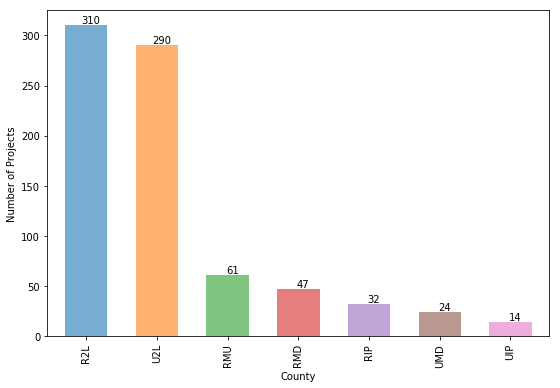

In [144]:
bar_chart(data=Project_roadway, 
          xlabel='County', 
          ylabel='Number of Projects' 
          )

In [37]:
def SIGN (x):
    if x.Final_EEC >0:
        return "P"
    elif x.Final_EEC <0:
        return "N"
    else:
        return "0"

In [58]:
sorted_ ["Sign"] = sorted_.apply (SIGN, axis = 1)
sorted_

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign
428,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,Jefferson,056-KY-1747 -000,10.500,11.995,Existing,419.126769,429,294.140706,713.267475,P
612,493,613,7,Lexington MPO,IP20060245,7-438,REDUCE CONGESTION ON KY-4 (NEW CIRCLE RD) FROM...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,Fayette,034-KY-0004 -000,13.195,14.508,Existing,236.012679,613,401.575585,637.588264,P
671,456,672,7,Lexington MPO,IP20190164,NaN,"Address Congestion, Improve Safety, and Improv...",Major Widening,Major Widening-Urban Streets,1,Fayette,034-CS-4524 -000,12.786,14.255,Existing,203.757767,672,217.934056,421.691823,P
426,503,427,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130129,NaN,Improve safety and reduce congestion on KY 44 ...,Congestion Management,Access Consolidation,1,Bullitt,015-KY-0044 -000,12.215,12.940,Existing,169.237152,427,192.819521,362.056673,P
647,652,648,7,Lexington MPO,IP20150334,7-593.03 / 7-593.30,NEWTOWN PIKE EXTENSION FROM WEST MAIN ST. TO S...,NEW ROUTE(O),Construct Road in New Location,1,Fayette,034-US-0027 -000,6.207,6.441,Existing,245.641802,648,93.673443,339.315245,P
580,435,581,6,Northern Kentucky ADD,IP20150257,6-447,IMPROVE MOBILITY AND REDUCE CONGESTION ON US-2...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,Boone,008-US-0025 -000,5.085,9.200,Existing,145.806614,581,148.916873,294.723487,P
567,818,568,6,Northern Kentucky ADD,IP20130008,6-446,PROVIDE EAST-WEST CONNECTIVITY AND IMPROVED MO...,NEW ROUTE(O),Construct Road in New Location,1,Boone,008-US-0042 -000,12.508,13.489,Existing,132.243175,568,156.918101,289.161276,P
501,685,502,5,Louisville-Southern Indiana (KIPDA) MPO,IP20160186,5-323.01,WIDEN GREENWOOD ROAD FROM GREENBELT HWY TO DIX...,MAJOR WIDENING(O),Install Two-way Left Turn Lane,1,Jefferson,056-KY-1931 -000,0.540,3.148,Existing,111.006769,502,129.634312,240.641081,P
600,500,601,6,Northern Kentucky ADD,IP20190064,NaN,Paired Grade-Separated Intersections along KY ...,Congestion Management,NaN,1,Boone,008-KY-0018 -000,14.500,15.100,Existing,139.390583,601,89.270380,228.660963,P
802,601,803,9,Gateway ADD,IP20150436,9-301.10,NEW ROUTE FROM US-60/KY-32 EAST OF MOREHEAD TO...,NEW ROUTE(O),Construct Road in New Location,1,Rowan,103-KY-0032 -000,5.400,8.400,Existing,195.888528,803,16.954721,212.843249,P


In [59]:
sorted_ ["Sign"].value_counts ()

P    433
N    424
0    109
Name: Sign, dtype: int64

In [83]:
positive_EEC = sorted_[sorted_ ["Sign"] == "P"]
positive_EEC.head (2)

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign
428,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,Jefferson,056-KY-1747 -000,10.500,11.995,Existing,419.126769,429,294.140706,713.267475,P
612,493,613,7,Lexington MPO,IP20060245,7-438,REDUCE CONGESTION ON KY-4 (NEW CIRCLE RD) FROM...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,Fayette,034-KY-0004 -000,13.195,14.508,Existing,236.012679,613,401.575585,637.588264,P


In [104]:
merged5 = pd.merge (positive_EEC, Unique, left_on = "Routeuniqu", right_on = "RT_UNIQUE", how = "inner")
merged5

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,...,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign,RT_UNIQUE,Roadway type
0,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,...,10.500,11.995,Existing,419.126769,429,294.140706,713.267475,P,056-KY-1747 -000,UMD
1,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,...,10.500,11.995,Existing,419.126769,429,294.140706,713.267475,P,056-KY-1747 -000,UMU
2,681,449,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150293,5-344.01 / 5-344.02,WIDEN SOUTHBOUND HURSTBOURNE LANE TO 3 LANES F...,RECONSTRUCTION(O),Major Widening-Urban Streets,1,...,12.289,13.632,Existing,8.795228,449,96.262380,105.057608,P,056-KY-1747 -000,UMD
3,681,449,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150293,5-344.01 / 5-344.02,WIDEN SOUTHBOUND HURSTBOURNE LANE TO 3 LANES F...,RECONSTRUCTION(O),Major Widening-Urban Streets,1,...,12.289,13.632,Existing,8.795228,449,96.262380,105.057608,P,056-KY-1747 -000,UMU
4,398,401,5,Louisville-Southern Indiana (KIPDA) MPO,IP20080218,May-53,IMPROVE THE HURSTBOURNE PARKWAY (KY 1747) AT S...,SAFETY(P),Improve Intersection,1,...,13.400,13.600,Existing,61.106255,401,39.718983,100.825237,P,056-KY-1747 -000,UMD
5,398,401,5,Louisville-Southern Indiana (KIPDA) MPO,IP20080218,May-53,IMPROVE THE HURSTBOURNE PARKWAY (KY 1747) AT S...,SAFETY(P),Improve Intersection,1,...,13.400,13.600,Existing,61.106255,401,39.718983,100.825237,P,056-KY-1747 -000,UMU
6,493,613,7,Lexington MPO,IP20060245,7-438,REDUCE CONGESTION ON KY-4 (NEW CIRCLE RD) FROM...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,...,13.195,14.508,Existing,236.012679,613,401.575585,637.588264,P,034-KY-0004 -000,UIP
7,493,613,7,Lexington MPO,IP20060245,7-438,REDUCE CONGESTION ON KY-4 (NEW CIRCLE RD) FROM...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,...,13.195,14.508,Existing,236.012679,613,401.575585,637.588264,P,034-KY-0004 -000,UMD
8,456,672,7,Lexington MPO,IP20190164,NaN,"Address Congestion, Improve Safety, and Improv...",Major Widening,Major Widening-Urban Streets,1,...,12.786,14.255,Existing,203.757767,672,217.934056,421.691823,P,034-CS-4524 -000,UMD
9,554,671,7,Lexington MPO,IP20190163,NaN,"Improve congestion, safety and mobility on Man...",Major Widening,Major Widening-Urban Streets,1,...,14.255,15.241,Existing,31.560012,671,168.264696,199.824708,P,034-CS-4524 -000,UMD


In [105]:
merged6 = merged5.drop_duplicates (["ProjectNo"])
merged6

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,...,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign,RT_UNIQUE,Roadway type
0,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,...,10.500,11.995,Existing,419.126769,429,294.140706,713.267475,P,056-KY-1747 -000,UMD
2,681,449,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150293,5-344.01 / 5-344.02,WIDEN SOUTHBOUND HURSTBOURNE LANE TO 3 LANES F...,RECONSTRUCTION(O),Major Widening-Urban Streets,1,...,12.289,13.632,Existing,8.795228,449,96.262380,105.057608,P,056-KY-1747 -000,UMD
4,398,401,5,Louisville-Southern Indiana (KIPDA) MPO,IP20080218,May-53,IMPROVE THE HURSTBOURNE PARKWAY (KY 1747) AT S...,SAFETY(P),Improve Intersection,1,...,13.400,13.600,Existing,61.106255,401,39.718983,100.825237,P,056-KY-1747 -000,UMD
6,493,613,7,Lexington MPO,IP20060245,7-438,REDUCE CONGESTION ON KY-4 (NEW CIRCLE RD) FROM...,MAJOR WIDENING(O),Modernize Roadway-Rural,1,...,13.195,14.508,Existing,236.012679,613,401.575585,637.588264,P,034-KY-0004 -000,UIP
8,456,672,7,Lexington MPO,IP20190164,NaN,"Address Congestion, Improve Safety, and Improv...",Major Widening,Major Widening-Urban Streets,1,...,12.786,14.255,Existing,203.757767,672,217.934056,421.691823,P,034-CS-4524 -000,UMD
9,554,671,7,Lexington MPO,IP20190163,NaN,"Improve congestion, safety and mobility on Man...",Major Widening,Major Widening-Urban Streets,1,...,14.255,15.241,Existing,31.560012,671,168.264696,199.824708,P,034-CS-4524 -000,UMD
10,503,427,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130129,NaN,Improve safety and reduce congestion on KY 44 ...,Congestion Management,Access Consolidation,1,...,12.215,12.940,Existing,169.237152,427,192.819521,362.056673,P,015-KY-0044 -000,U2L
14,539,444,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150201,5-150.50,SECTION 5 - FROM US-31EX TO US-31E BYPASS. (20...,RECONSTRUCTION(O),Major Widening-Urban Streets,1,...,22.800,23.250,Existing,107.071581,444,50.884245,157.955826,P,015-KY-0044 -000,U2L
18,760,453,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150318,5-150.02,SECTION -1 FROM I-65 TO CHIMNEY ROCK DRIVE.(06...,RECONSTRUCTION(O),Major Widening-Urban Streets,1,...,13.100,15.100,Existing,21.266167,453,45.391416,66.657584,P,015-KY-0044 -000,U2L
22,780,450,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150305,5-150.40,SECTION 4 - FROM ARMSTRONG LANE TO US 31EX. (2...,RECONSTRUCTION(O),Modernize & Widen Roadway-Rural,1,...,21.000,22.800,Existing,-0.394212,450,44.543369,44.149157,P,015-KY-0044 -000,U2L


In [102]:
merged6 ["Roadway type"].value_counts ()

U2L    172
R2L    122
RMU     35
RMD     30
RIP     15
UMD     13
UIP      5
Name: Roadway type, dtype: int64

In [106]:
merged6 ["TYROUTENAM"].value_counts ()

Existing    370
Impacted     20
Approach      2
Name: TYROUTENAM, dtype: int64

In [109]:
Existing = merged6 [merged6 ["TYROUTENAM"]== "Existing"]
Existing.head(2)

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,...,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign,RT_UNIQUE,Roadway type
0,438,429,5,Louisville-Southern Indiana (KIPDA) MPO,IP20130135,5-555,REDUCE CONGESTION AND IMPROVE SAFETY ALONG KY-...,CONGESTION MITIGTN(O),Modernize Roadway-Urban,1,...,10.500,11.995,Existing,419.126769,429,294.140706,713.267475,P,056-KY-1747 -000,UMD
2,681,449,5,Louisville-Southern Indiana (KIPDA) MPO,IP20150293,5-344.01 / 5-344.02,WIDEN SOUTHBOUND HURSTBOURNE LANE TO 3 LANES F...,RECONSTRUCTION(O),Major Widening-Urban Streets,1,...,12.289,13.632,Existing,8.795228,449,96.262380,105.057608,P,056-KY-1747 -000,UMD


In [111]:
#Existing ["PROJTYPE"].value_counts ()

In [85]:
negative_EEC = sorted_[sorted_ ["Sign"] == "N"]
negative_EEC.head (2)

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign
246,346,247,3,Barren River ADD,IP20140045,NaN,Improve safety and address geometric deficienc...,Spot Improvement,Other Improvement Types,2,Edmonson,031-KY-2336 -000,3.422,3.522,Existing,0.088374,247,-0.095237,-0.006863,N
961,932,962,12,FIVCO ADD,IP20190046,NaN,Construct extension of KY 1185 from Boy Scout ...,New Route,Construct Road in New Location,2,Lawrence,064-KY-1185 -000,0.000,0.001,Existing,-0.014305,0,0.000000,-0.014305,N


In [86]:
zero_EEC = sorted_[sorted_ ["Sign"] == "0"]
zero_EEC.head (2)

,FID_1,ProjectNo,Dist,AddMPOName,IDENTIFIER,IDENTIFI_1,DESC_,PROJTYPE,ESTIMPRVAS,ROUTEORDER,TYCOUNTYDI,Routeuniqu,BEGINNINGM,ENDINGMILE,TYROUTENAM,EEC_Intersection,ProjectN_1,Roadway_EEC,Final_EEC,Sign
842,879,843,10,Kentucky River ADD,IP20150243,10-292.10 / 10-292.12,I-75 TO MOUNTAIN PARKWAY; RECONSTRUCT KY-11 FR...,RECONSTRUCTION(O),Modernize & Widen Roadway-Rural,3,Lee,065-PF-9999 -000,0.0,0.0,Proposed,0.0,0,0.0,0.0,0
748,799,749,8,Lake Cumberland ADD,IP20190161,NaN,"Improve the existing route, CS-2078 (Progress ...",New Route,Construct Road in New Location,2,Russell,104-PF-9999 -000,0.0,0.0,Proposed,0.0,0,0.0,0.0,0


In [62]:
positive_EEC ["TYROUTENAM"].value_counts ()

Existing    409
Impacted     20
Approach      4
Name: TYROUTENAM, dtype: int64

In [65]:
negative_EEC ["TYROUTENAM"].value_counts ()

Existing    397
Impacted     21
Approach      6
Name: TYROUTENAM, dtype: int64

In [67]:
zero_EEC ["TYROUTENAM"].value_counts ()

Existing    56
Proposed    46
Approach     4
Impacted     3
Name: TYROUTENAM, dtype: int64

In [103]:
project_type = merged2 ["TYROUTENAM"].value_counts()
project_type

Existing    862
Proposed     46
Impacted     44
Approach     14
Name: TYROUTENAM, dtype: int64